# Chapter 3. Algorithm Analysis

"Simply put, a **data structure** is a systematic way of organizing and accessing data, and an **algorithm** is a step-by-step procedure for performing some task in a finite amount of time." (110)

## 3.1. Experimental studies

You can measure the performance of an algorithm by seeing how long it takes to run:

In [1]:
from time import time

def function_to_benchmark(size):
    "-".join(str(n) for n in range(size))

start_time = time()
function_to_benchmark(100)
end_time = time()

end_time - start_time

9.012222290039062e-05

The above isn't a brilliant measure of the performance of an algorithm though, because other programs might use up CPU cycles between its start and end. You'd get a better measurement by looking at the number of CPU cycles used by the algorithm.

Python has a nice module called `timeit` to measure benchmark algorithms by looking at how many CPU cycles they use, and can even repeat the test a given number of times to help eliminate factors like small variances in the CPU's performance.

In [2]:
from timeit import timeit

timeit(lambda: function_to_benchmark(100), number=10) / 10

4.704680000000572e-05

A nice way to go about measuring the performance of an algorithm is to run it with different input sizes and visualise the results with a scatterplot. Input size on the x axis and running time on the y axis.

In [3]:
# https://nickmccullum.com/python-visualization/scatterplot/

import matplotlib.pyplot as plt

%matplotlib inline

from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

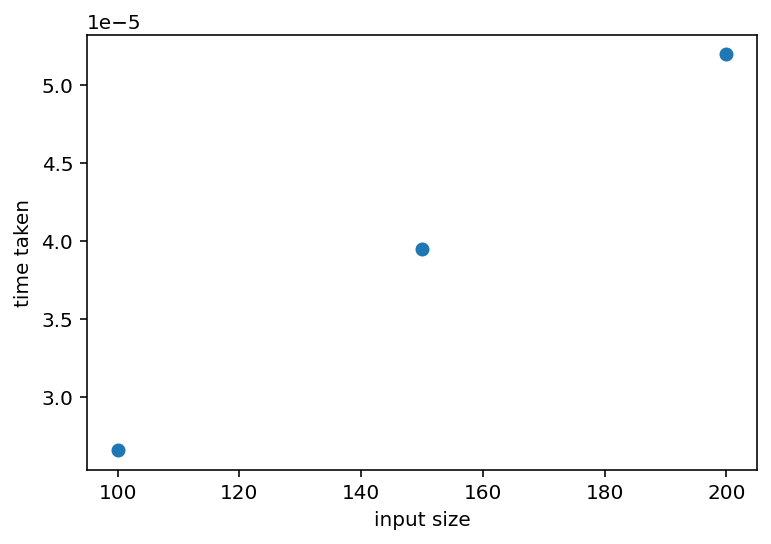

In [6]:
input_sizes = [100, 150, 200]

durations = [timeit(lambda: function_to_benchmark(n), number=15) / 15 for n in input_sizes]

plt.xlabel('input size')
plt.ylabel('time taken')
plt.scatter(input_sizes, durations)

#### Challenges of experimental analysis

The most serious drawback of experimental analysis is that you need to fully implement an algorithm to accurately test its performance. "At early stages of design, when considering a choice of data structures or algorithms, it would be foolish to spend a significant amount of time implementing an approach that could easily be deemed inferior by a higher-level analysis" (112).

### 3.1.1. Moving beyond experimental analysis

>Our goal is to develop an approach to analyzing the efficiency of algorithms that:
>1. Allows us to evaluate the relative efficiency of any two algorithms in a way that is **independent of the hardware and software environment.**
>2. Is performed by studying a high-level description of the algorithm **without need for implementation.**
>3. Takes into account **all possible inputs.** (113)

#### Counting primitive operations

To construct a high-level description of an algorithm, it should be broken down into _primitive operations_ such as...

1. Assigning an identifier to an object
2. Determining the object associated with an identifier
3. Performing an arithmetic operation (for example, adding two numbers)
4. Comparing two numbers
5. Accessing a single element of a Python `list` by index
6. Calling a function (excluding operations executed within the function)
7. Returning from a function

"Formally, a primitive operation corresponds to a low-level instruction with an execution time that is constant" (113). In practice, many of these operations are translated into a small number of hardware instructions but for simplicity we'll assume each _primitive operation_ takes the same length of time and use the count of operations as _t_ to measure the running time of the algorithm.

To capture the **order of growth** of an algorithm’s running time, each algorithm can be assigned a function _f(n)_ which characterises the number of primitive operations performed as a function of the input size _n_. There are seven common functions for this characterisation:

1. Constant
2. Logarithm
3. Linear
4. _N_-Log-_N_
5. Quadratic
6. Cubic (and other polynomials)
7. Exponential

A note: different _kinds_ of input (of the same size) might perform differently. To keep things simple, we assume worst-case input. "Making the standard of success for an algorithm to perform well in the worst case necessarily requires that it will do well on every input" (114).

## 3.2. The seven order of growth functions